In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
X = stats.norm(1, 0.5)

In [3]:
X.mean()

1.0

In [4]:
X.median()

1.0

In [5]:
X.std()

0.5

In [6]:
X.var()

0.25

In [7]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [8]:
X.stats()

(array(1.), array(0.25))

In [9]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [10]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

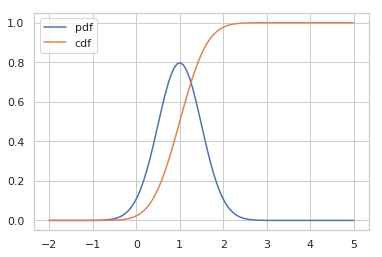

In [12]:
x = np.linspace(-2,5,101)
plt.plot(x,X.pdf(x),label='pdf')
plt.plot(x,X.cdf(x),label='cdf')
plt.legend()

In [13]:
X.interval(0.9799)

(-0.162237966505272, 2.162237966505272)

In [14]:
X.stats()

(array(1.), array(0.25))

In [16]:
X=stats.norm(0,1)

In [17]:
X.cdf(3)

0.9986501019683699

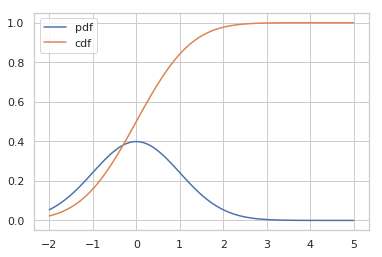

In [18]:
x = np.linspace(-2,5,101)
plt.plot(x,X.pdf(x),label='pdf')
plt.plot(x,X.cdf(x),label='cdf')
plt.legend()

<BarContainer object of 100 artists>

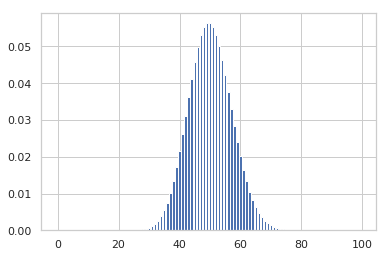

In [20]:
X=stats.poisson(50)
x=np.arange(100)
plt.bar(x,X.pmf(x))

Text(0, 0.5, 'Poisson dist.')

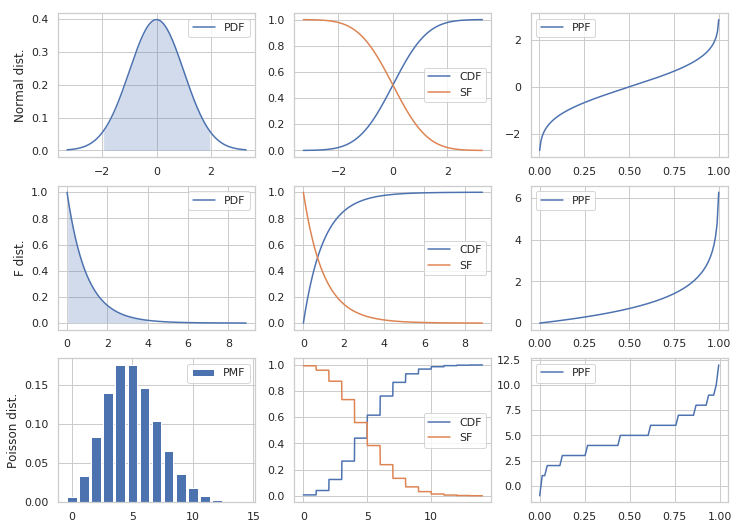

In [30]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random
    variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)
    
    if hasattr(X.dist, "pdf"):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # discrete random variables do not have a pdf method,
        #instead we use pmf:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
        
        
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

In [31]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [32]:
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [33]:
X = stats.norm(1, 0.5)
X.rvs(10)

array([ 0.18640271,  1.63757624, -0.05051371,  1.52963228,  1.50123389,
        0.57976719,  1.07295874,  0.62013654,  0.79695492,  0.53461412])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


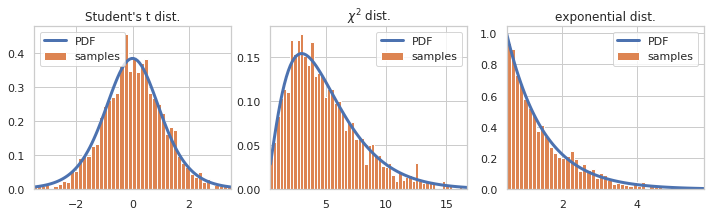

In [34]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous
    random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

(array([ 1.,  0.,  1.,  1.,  0.,  4.,  0.,  3., 13.,  6.,  5.,  8., 13.,
         7., 24., 15., 24., 24., 25., 27., 35., 56., 45., 36., 44., 35.,
        47., 39., 46., 44., 40., 44., 28., 23., 24., 32., 27., 24., 16.,
        21., 28., 12., 11.,  7., 10.,  6.,  7.,  5.,  4.,  3.]),
 array([-3.0238789 , -2.91276672, -2.80165455, -2.69054238, -2.5794302 ,
        -2.46831803, -2.35720585, -2.24609368, -2.13498151, -2.02386933,
        -1.91275716, -1.80164498, -1.69053281, -1.57942063, -1.46830846,
        -1.35719629, -1.24608411, -1.13497194, -1.02385976, -0.91274759,
        -0.80163542, -0.69052324, -0.57941107, -0.46829889, -0.35718672,
        -0.24607454, -0.13496237, -0.0238502 ,  0.08726198,  0.19837415,
         0.30948633,  0.4205985 ,  0.53171067,  0.64282285,  0.75393502,
         0.8650472 ,  0.97615937,  1.08727155,  1.19838372,  1.30949589,
         1.42060807,  1.53172024,  1.64283242,  1.75394459,  1.86505676,
         1.97616894,  2.08728111,  2.19839329,  2.30950546,

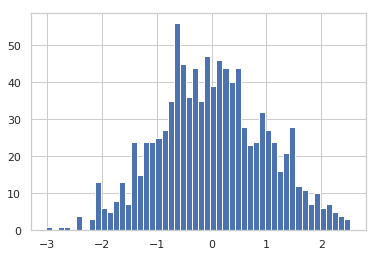

In [35]:
X = stats.norm(0,1)
b = X.rvs(1000)
plt.hist(b,50)#高斯分布

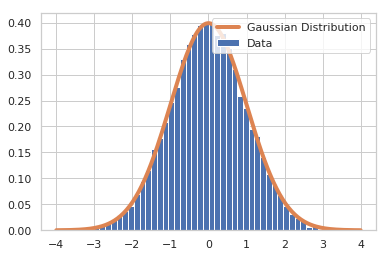

In [38]:
a=np.random.randn(10000)
plt.hist(a,50,density=1,label='Data')
x=np.linspace(-4,4,200)
X=stats.norm(0,1)
plt.plot(x,X.pdf(x),lw=4,label='Gaussian Distribution')
plt.legend()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 2., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 28.95122432,  30.42704208,  31.90285984,  33.3786776 ,
         34.85449536,  36.33031311,  37.80613087,  39.28194863,
         40.75776639,  42.23358415,  43.70940191,  45.18521967,
         46.66103743,  48.13685519,  49.61267295,  51.0884907 ,
         52.56430846,  54.04012622,  55.51594398,  56.99176174,
         58.4675795 ,  59.94339726,  61.41921502,  62.89503278,
         64.37085054,  65.8466683 ,  67.32248605,  68.79830381,
         70.27412157,  71.74993933,  73.22575709,  74.70157485,
         76.17739261,  77.65321037,  79.12902813,  80.60484589,
         82.08066364,  83.5564814 ,  85.03229916,  86.50811692,
         87.98393468,  89.45975244,  90.9355702 ,  92.41138796,
         93.88720572,  95.36302348,  96.83884123,  98.31465899,
      

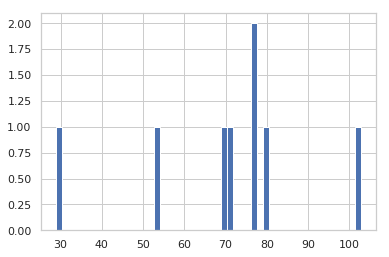

In [39]:
X = stats.norm(80,20)
b = X.rvs(8)
plt.hist(b,50)

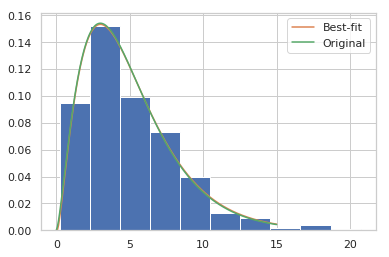

In [40]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
Y = stats.chi2(df=df, loc=loc, scale=scale)
x = np.linspace(0,15,200)
plt.hist(X_samples,density=1)
plt.plot(x, Y.pdf(x),label='Best-fit')
plt.plot(x, X.pdf(x),label='Original')
plt.legend()

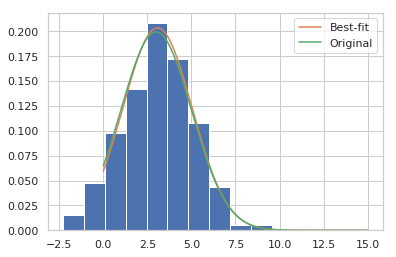

In [41]:
X = stats.norm(3,2)
X_samples = X.rvs(500)
loc, scale = stats.norm.fit(X_samples)
Y = stats.norm(loc=loc, scale=scale)

x = np.linspace(0,15,200)
plt.hist(X_samples,density=1)
plt.plot(x, Y.pdf(x),label='Best-fit')
plt.plot(x, X.pdf(x),label='Original')
plt.legend()